# Data Mining Project
Siannas Spyridon - 1053718 (HMTY)

## Task 1

### A. Analyze the dataset

We are going to import pandas and matplotlib which are going to help us with
the data visualization

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.helpers import plot_frequency
%matplotlib inline

We should define some helper functions to help us with our data manipulation later on

First, we should load the data from the csv file and view the characteristics names

In [2]:
data = pd.read_csv("dataset/healthcare-dataset-stroke-data/healthcare-dataset-stroke-data.csv")
', '.join(data.columns.values)

'id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke'

Then, we should take a first look at the values

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


With a first glance we can get extract some information from our data

In [16]:
### Average specimen age:
data.age.mean()

43.226614481409

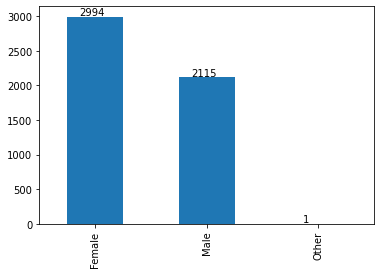

In [84]:
### Specimen genders:
plot_frequency("gender")

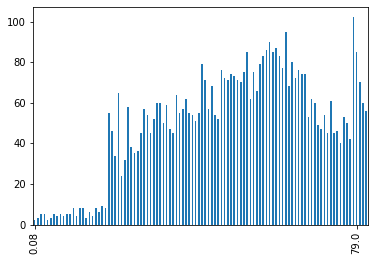

In [148]:
### Specimen age groups:
plot = data.age.value_counts().sort_index().plot.bar()
x=np.array([0,100])
plot.set(xticks=x)
plt.show()

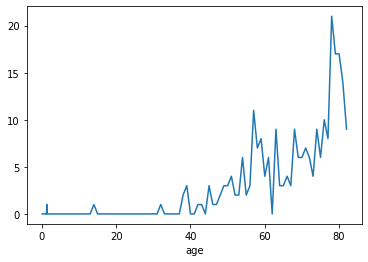

In [127]:
### Strokes per age
plot = data.groupby("age").stroke.sum().plot()

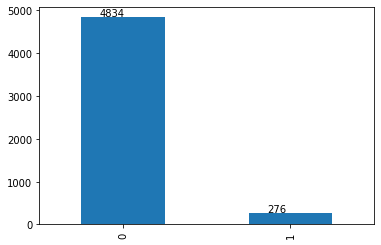

In [149]:
### Heart disease frequency
plot_frequency("heart_disease")

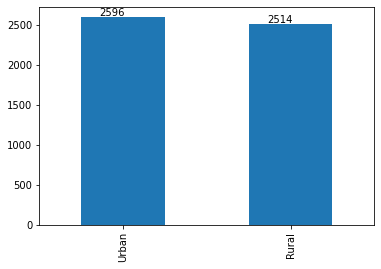

In [150]:
### Residence frequency
plot_frequency("Residence_type")

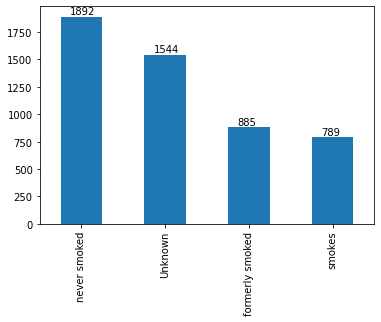

In [151]:
### Smoking status frequency
plot_frequency("smoking_status")

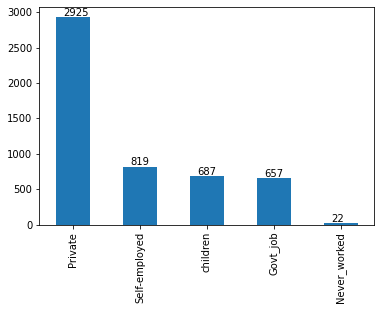

In [152]:
### Work type frequency
plot_frequency('work_type')

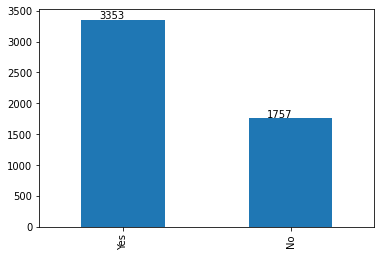

In [154]:
### Marital status frequency (Was the specimen married at some point in his life)
plot_frequency("ever_married")

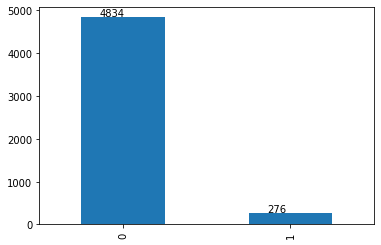

In [155]:
### Heart disease frequency
plot_frequency("heart_disease")

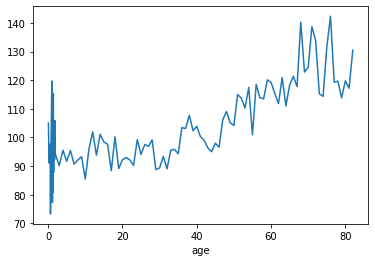

In [161]:
### Average glucose level per age